<a href="https://colab.research.google.com/github/KhushiAgrawal0407/Spectrum-Prediction-using-LSTM/blob/main/mySP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 241s 91ms/step - accuracy: 0.8542 - loss: 0.3822 - mean_squared_error: 0.1130 - val_accuracy: 0.8704 - val_loss: 0.3458 - val_mean_squared_error: 0.1012
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 224s 90ms/step - accuracy: 0.8757 - loss: 0.3436 - mean_squared_error: 0.1000 - val_accuracy: 0.8707 - val_loss: 0.3433 - val_mean_squared_error: 0.1011
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 263s 90ms/step - accuracy: 0.8755 - loss: 0.3402 - mean_squared_error: 0.0994 - val_accuracy: 0.8707 - val_loss: 0.3397 - val_mean_squared_error: 0.1004
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 315s 111ms/step - accuracy: 0.8727 - loss: 0.3415 - mean_squared_error: 0.1003 - val_accuracy: 0.8707 - val_loss: 0.3411 - val_mean_squared_error: 0.1012
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 224s 90ms/step - accuracy: 0.8747 - loss: 0.3390 - mean_squared_error: 0.0994 - val_accuracy: 0.8707 - val_loss: 0.3400 - val_mean_squared_error: 0.1005
Epoch 6/50
2500/2500 ━━━

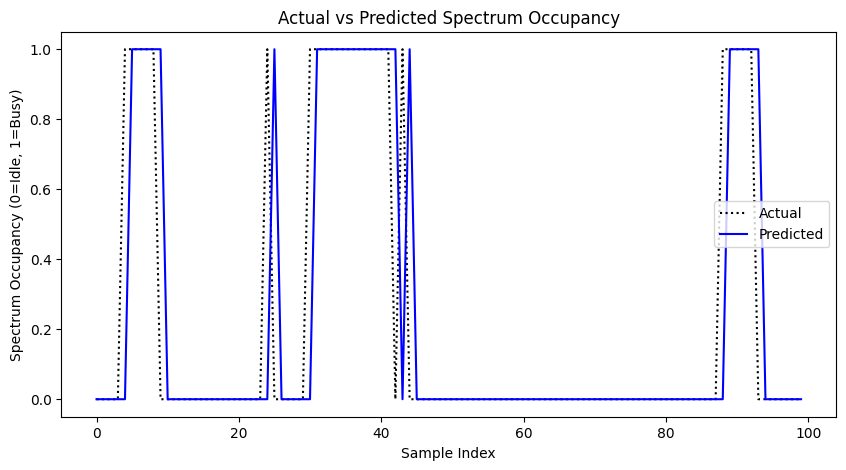


Final Training MSE: 0.0972
Final Validation MSE: 0.0985


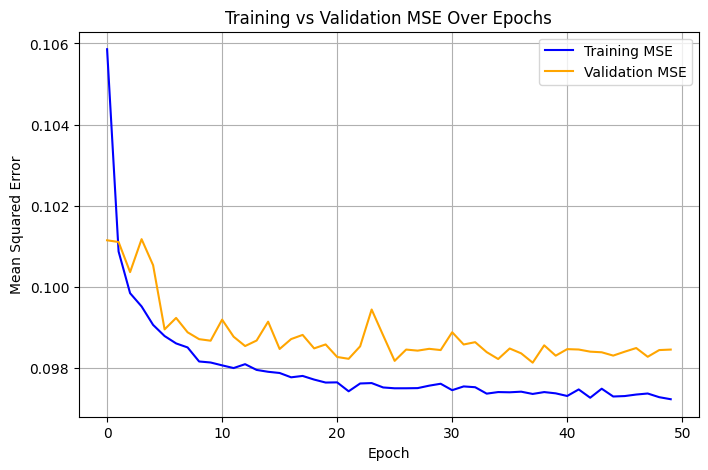

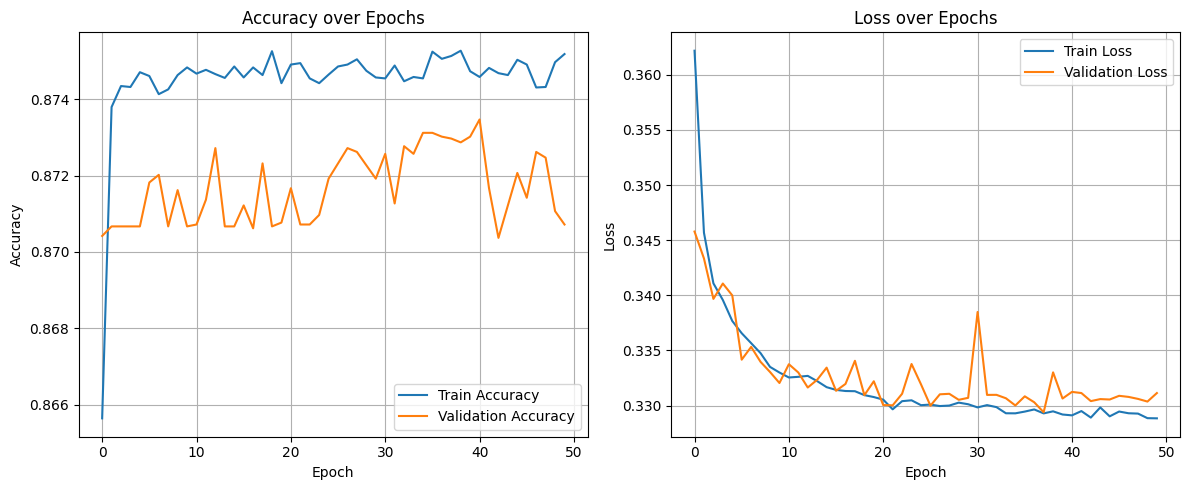

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt

# Generate synthetic spectrum occupancy data with stronger temporal correlation
def generate_data(samples=100000, timesteps=25):
    np.random.seed(42)
    data = np.random.randint(0, 2, size=(samples,))
    data = np.correlate(data, np.ones(5)/5, mode='same') > 0.7  # Increase correlation
    X, y = [], []
    for i in range(len(data) - timesteps):
        X.append(data[i:i + timesteps])
        y.append(data[i + timesteps])
    return np.array(X), np.array(y)

# Load and preprocess data
timesteps = 25
X, y = generate_data(samples=100000, timesteps=timesteps)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
y = np.array(y)

# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build improved LSTM model
def build_lstm_model():
    model = Sequential([
        LSTM(128, return_sequences=True, activation='tanh', input_shape=(timesteps, 1)),
        BatchNormalization(),
        Dropout(0.4),
        LSTM(128, return_sequences=False, activation='tanh'),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.MeanSquaredError()])
    return model

model = build_lstm_model()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Plot actual vs predicted spectrum occupancy
plt.figure(figsize=(10,5))
plt.plot(y_test[:100], label='Actual', linestyle='dotted', color='black')
plt.plot(y_pred_binary[:100], label='Predicted', linestyle='solid', color='blue')
plt.xlabel("Sample Index")
plt.ylabel("Spectrum Occupancy (0=Idle, 1=Busy)")
plt.title("Actual vs Predicted Spectrum Occupancy")
plt.legend()
plt.show()

# Print final MSE values
final_train_mse = history.history['mean_squared_error'][-1]
final_val_mse = history.history['val_mean_squared_error'][-1]
print(f"\nFinal Training MSE: {final_train_mse:.4f}")
print(f"Final Validation MSE: {final_val_mse:.4f}")

# Plot MSE over epochs
plt.figure(figsize=(8, 5))
plt.plot(history.history['mean_squared_error'], label='Training MSE', color='blue')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training vs Validation MSE Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



In [ ]:
# RHM: Generate random predictions
np.random.seed(42)  # To ensure reproducibility
y_pred_rhm = np.random.randint(0, 2, size=len(y_test))


In [ ]:
pip install hmmlearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 3.6 MB/s eta 0:00:00


In [ ]:
from hmmlearn.hmm import GaussianHMM
from sklearn.preprocessing import MinMaxScaler

# Flatten for HMM input
X_train_hmm = X_train.reshape(X_train.shape[0], -1)
X_test_hmm = X_test.reshape(X_test.shape[0], -1)

# Fit HMM
hmm_model = GaussianHMM(n_components=2, covariance_type="diag", n_iter=1000, random_state=42)
hmm_model.fit(X_train_hmm)

# Get log-likelihood scores for each test sample individually
log_likelihoods = []
for sample in X_test_hmm:
    score = hmm_model.score(sample.reshape(1, -1))  # Reshape to 2D
    log_likelihoods.append(score)

log_likelihoods = np.array(log_likelihoods)

# Normalize
scaler = MinMaxScaler()
y_pred_hmm = scaler.fit_transform(log_likelihoods.reshape(-1, 1)).flatten()



In [ ]:
from sklearn.metrics import roc_curve, auc

# LSTM
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

# RHM
fpr_rhm, tpr_rhm, _ = roc_curve(y_test, y_pred_rhm)
roc_auc_rhm = auc(fpr_rhm, tpr_rhm)

# HMM
fpr_hmm, tpr_hmm, _ = roc_curve(y_test, y_pred_hmm)
roc_auc_hmm = auc(fpr_hmm, tpr_hmm)


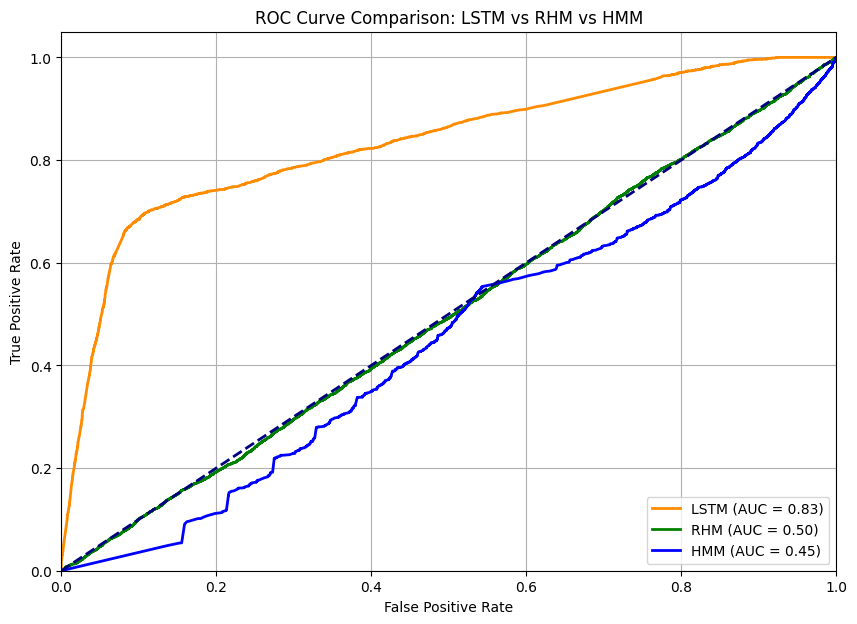

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(fpr_lstm, tpr_lstm, color='darkorange', lw=2, label=f'LSTM (AUC = {roc_auc_lstm:.2f})')
plt.plot(fpr_rhm, tpr_rhm, color='green', lw=2, label=f'RHM (AUC = {roc_auc_rhm:.2f})')
plt.plot(fpr_hmm, tpr_hmm, color='blue', lw=2, label=f'HMM (AUC = {roc_auc_hmm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # baseline

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: LSTM vs RHM vs HMM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


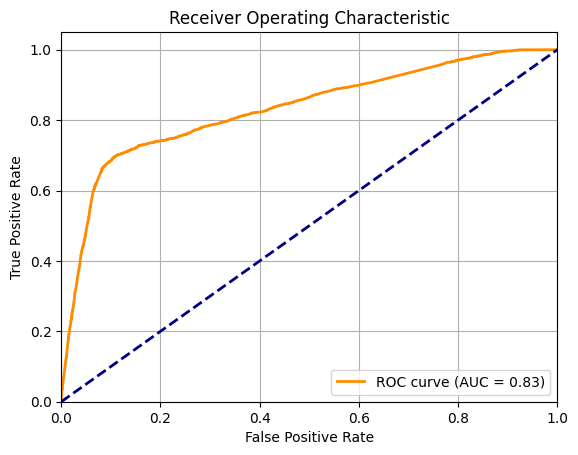

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

y_true = y_test  # Or however you store actual labels

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # random chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)

print(f"Mean Squared Error: {mse}")
print(f"Accuracy: {accuracy * 100:.2f}%")

Mean Squared Error: 0.12928232058014505
Accuracy: 87.07%


True Positives: 2434
False Positives: 1321
True Negatives: 14976
False Negatives: 1264


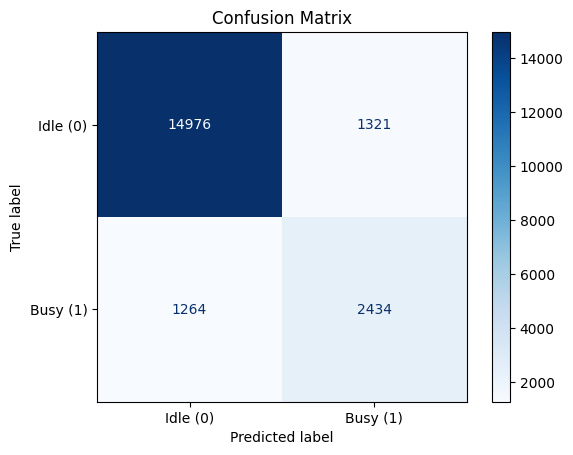

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
tn, fp, fn, tp = cm.ravel()

print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}")
cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Idle (0)", "Busy (1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


NameError: name 'y_test' is not defined

In [ ]:
import numpy as np

# Assuming X_train is a NumPy array with boolean values (True/False)
true_count_train = np.count_nonzero(X_train)

print(f"Number of True values in X_train: {true_count_train}")

Number of True values in X_train: 380783


In [ ]:
import numpy as np

# Assuming X_train is a NumPy array with boolean values (True/False)
true_count_train = np.count_nonzero(X_train)
false_count_train = np.count_nonzero(X_train == False)  # or X_train.shape[0] - true_count_train

print(f"Number of True values in X_train: {true_count_train}")
print(f"Number of False values in X_train: {false_count_train}")

Number of True values in X_train: 380783
Number of False values in X_train: 1618717
